In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sympy import symbols, solve
from sympy.plotting import plot

In [112]:
lam = 1
N = np.array([150, 50, 150, 80, 40, 250])
mu = np.array([36, 42, 42, 30, 60, 90])
transitions = [lam/(N[i]-2) for i in range(len(N))]

def calulate_section_availability(transitions, mu):
    return [1-(transitions[i]/(transitions[i]*mu[i])) for i in range(len(transitions))]

section_availability = calulate_section_availability(transitions, mu)
section_availability

[0.006756756756756757, 0.020833333333333332, 0.006756756756756757, 0.01282051282051282, 0.02631578947368421, 0.004032258064516129]


[0.9722222222222222,
 0.9761904761904762,
 0.9761904761904762,
 0.9666666666666667,
 0.9833333333333333,
 0.9888888888888889]

In [56]:
def availability_func(a: list):
    return (1-(1-a[0]*a[3])*(1-a[4]))*a[1]*a[2]*a[5]

availability_func(section_availability)

0.9414142683536606

In [57]:

max_employees = 15
availebilites = []
for employees in range(1, max_employees+1):
    section_availability = calulate_section_availability(transitions, mu*employees)
    availebilites.append(availability_func(section_availability))

availebilites


[0.9414142683536606,
 0.9706627826870025,
 0.9804344176722799,
 0.9853233720139805,
 0.9882576156509181,
 0.9902141099671458,
 0.9916117586379938,
 0.9926600748892986,
 0.9934754775697644,
 0.9941278276303388,
 0.9946615866196747,
 0.9951063979344446,
 0.9954827852302423,
 0.9958054090202832,
 0.9960850208099358]

Text(0.5, 1.0, 'Availability')

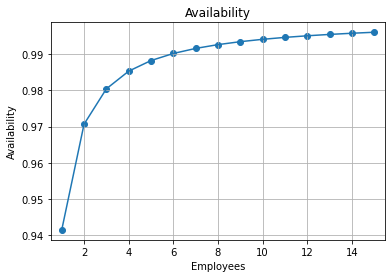

In [115]:
fig, ax = plt.subplots()
ax.plot(range(1,16), availebilites)
ax.scatter(range(1,16), availebilites)
ax.grid()
ax.set_xlim((0.5, 15.5))
ax.set_xlabel('Employees')
ax.set_ylabel('Availability')
ax.set_title("Availability with multiple employees")

In [102]:
def reliability_func(transitions:list):
    t = symbols('t')
    return math.e**(-sum(transitions)*t)

def reliability_func(transitions:list, t):
    return math.e**(-sum(transitions)*t)

x = np.linspace(0,60,10000)

R = reliability_func(transitions,x)

Text(0.5, 1.0, 'Reliability function')

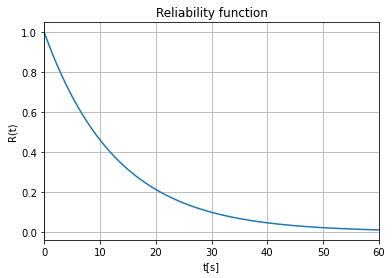

In [109]:
fig, ax = plt.subplots()
ax.plot(x,R)
ax.grid()
ax.set_xlim((0, 60))
ax.set_xlabel('t[s]')
ax.set_ylabel('R(t)')
ax.set_title("Reliability function")